In [1]:
# Import the necessary libraries
import matplotlib
from matplotlib import pyplot as plt
import trading_env
import strategies
import pandas as pd
import numpy as np

num_trials = 100

# Environment parameters
env_config = {
    "ticker" : "TQQQ",
    "starting_equity" : 100,
    "step_contribution" : 0,
}
episode_length = 90

# Initialize the strategies
strategy_list = {
    "Do Nothing" : strategies.DoNothingStrategy(),
    "Buy and Hold" : strategies.BuyAndHoldStrategy(),
    # "PPO" : strategies.PPOStrategy(quiet=True),
    # "Regression" : strategies.RegressionSlopeStrategy(length=10, percentage=0.5),
    # "MACD" : strategies.MACDStrategy(percentage=1),
    "Jin" : strategies.JinStrategy(),
}

In [2]:
df = pd.DataFrame(columns=["start_timestamp"] + list(strategy_list.keys()), index=range(num_trials))
env = trading_env.TradingEnv(env_config={"episode_length": episode_length})

for trial_i in range(num_trials):
    if trial_i % (num_trials // 10) == 0: print(f"Executing trial {trial_i}...")

    for strategy_name, strategy_obj in strategy_list.items():
        # Reset environment
        state, info = env.reset(options=env_config)
        if "start_timestamp" not in env_config:
            df.loc[trial_i, "start_timestamp"] = env_config["start_timestamp"] = info["start_timestamp"]

        # Run the strategy
        terminated = truncated = False
        while not (terminated or truncated):
            action = strategy_obj.get_action(state)
            state, reward, terminated, truncated, _ = env.step(action)
                    
        # Save the results
        df.loc[trial_i, strategy_name] = state["cash"] + state["long"] * (state["close"][-1])

    del env_config["start_timestamp"]

Executing trial 0...
Executing trial 10...
Executing trial 20...
Executing trial 30...
Executing trial 40...
Executing trial 50...
Executing trial 60...
Executing trial 70...
Executing trial 80...


c:\Users\brand\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\brand\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Executing trial 90...


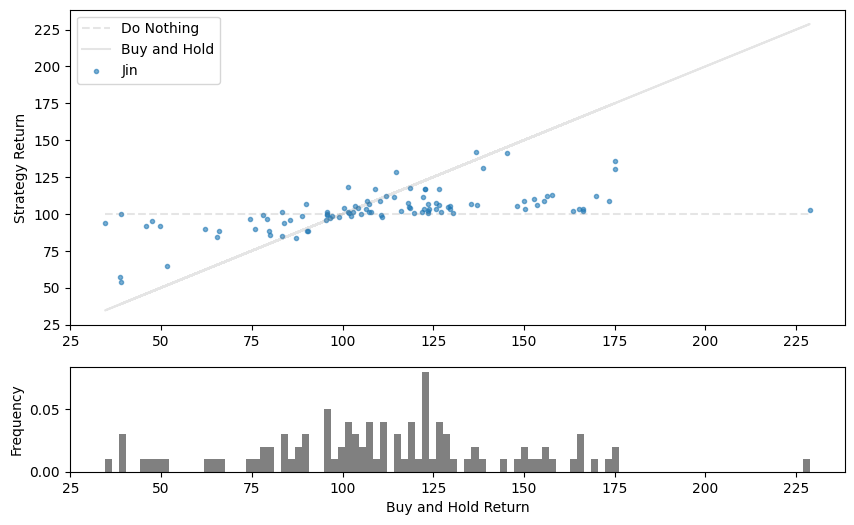

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=1, height_ratios=[3,1])
fig.set_size_inches((10,6))

xax = np.linspace(df["Buy and Hold"].min(), df["Buy and Hold"].max(), num=num_trials)
for strategy_name, strategy_obj in strategy_list.items():
    if strategy_name == "Buy and Hold":
        axs[0].plot(df[strategy_name], df[strategy_name], color="gray", alpha=0.2, label=strategy_name)
    elif strategy_name == "Do Nothing":
        axs[0].plot(xax, np.ones(num_trials)*env_config["starting_equity"], color="gray", linestyle="dashed", alpha=0.2, label=strategy_name)
    else:
        # if strategy_name != "Jin": continue
        axs[0].scatter(df["Buy and Hold"], df[strategy_name], marker=".", alpha=(37/(num_trials+59)+0.36), label=strategy_name)
axs[0].set_ylabel("Strategy Return")
axs[0].legend(loc="upper left")

axs[1].hist(df["Buy and Hold"], bins=np.clip(num_trials, a_min=None, a_max=100), weights=np.zeros_like(df["Buy and Hold"]) + 1./df["Buy and Hold"].size, color="gray")
axs[1].set_xlabel("Buy and Hold Return")
axs[1].set_ylabel("Frequency")

plt.show()